In [9]:
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white", context="talk", font_scale=1.2, palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.figsize'] = (8, 6)

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [10]:
dataset = 'covtype'

In [11]:
shared_path_prefix = './results/'
shared_path_suffix = '-{}_traces.npz'.format(dataset)
if dataset == 'covtype':
    all_data_paths = ['BSGD', 'SOAP', 'SOX-0.5-0.1-32-32', 'MOAP']
elif dataset == 'ijcnn1':
    all_data_paths = ['BSGD', 'SOAP', 'SOX-0.1-0.9-32-32', 'MOAP']
else:
    raise ValueError('Unknown dataset')


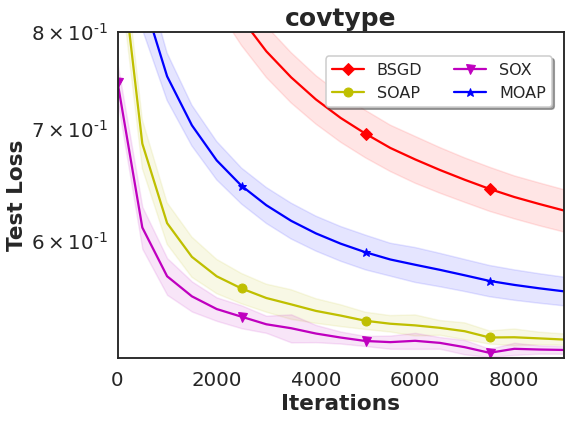

In [12]:
plt.figure(0).clf()
markers = ['D', 'o', 'v', '*', 'x', '']
colors = ['r', 'y', 'm', 'b', 'g', 'c']
ax = plt.axes()
for i, data_path in enumerate(all_data_paths):
    full_data_path = shared_path_prefix + data_path + shared_path_suffix
    meta_data = np.load(full_data_path)
    test_loss = np.array(meta_data['all_loss_traces'])
    if 'SOX' in data_path:
        alg_name = 'SOX'
    else:
        alg_name = data_path
    ax.plot(500 * np.arange(test_loss.shape[1] - 1), np.mean(np.array(test_loss), axis=0)[1:], markevery=5, marker=markers[i], color=colors[i], label=alg_name)
    ax.fill_between(500 * np.arange(test_loss.shape[1] - 1), np.mean(np.array(test_loss), axis=0)[1:] - np.std(np.array(test_loss), axis=0)[1:], np.mean(np.array(test_loss), axis=0)[1:] + np.std(np.array(test_loss), axis=0)[1:], alpha=0.1, color=colors[i])
ax.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.72, 0.95),
          fancybox=True, shadow=True, ncol=2)
ax.set_xlabel('Iterations', fontweight='bold')
if dataset == 'covtype':
    ax.set_ylim(bottom=0.51, top=0.8)
elif dataset == 'ijcnn1':
    ax.set_ylim(bottom=0.12, top=0.4)
else:
    raise ValueError('Unknown dataset')
plt.xlim(left=0, right=9000)
ax.set_yscale("log")
ax.set_title('covtype', fontsize=25, fontweight='bold')
ax.set_ylabel('Test Loss', fontweight='bold')
file_name = './figs/{}_test_loss_baselines.pdf'.format(dataset)
plt.savefig(file_name, dpi=300, bbox_inches='tight')

